## FDNote3W
Prepared by Inmoo Lee for the Financial Databases class at KAIST

inmool@kaist.ac.kr


List of output files

    - RHistoryNote3W.xlsx
    - LowPEHeadKRX.ft
    - RHistory.ft
    - LowPEHeadUS.ft
    - RHistoryESE.ft
    - RHistory.ft


In [1]:
import os
import pandas as pd
import numpy as np
from datetime import datetime as dt

# print(os.getcwd())  #get the current working directory
# path='d:\\###'#change this to your directory to work with
# os.chdir(path) # change the working directory
# print(os.getcwd())  #get the current working directory


## LSEG Workspace (used to be EIKON) API
from hhttps://developers.lseg.com/en/api-catalog/eikon/eikon-data-api/quick-start

First, install the eikon package

In [ ]:
# To use the eikon package, you need to install bottleneck first, if you haven't done so already.
#!pip install --user --upgrade bottleneck
#!pip install --upgrade bottleneck
# !pip install bottleneck

In [ ]:
#install eikon package
# !pip install eikon

In [3]:
from pathlib import Path

CWD = Path.cwd()
PROJ_PATH = CWD.parent.parent.parent

PROJ_PATH

WindowsPath('c:/Users/chlje/VSCodeProjects/KAIST_MFE')

In [8]:
from dotenv import load_dotenv
import os

load_dotenv(dotenv_path=PROJ_PATH / '.env')

API_KEY = os.getenv('EIKON_API_KEY')

In [2]:
#After installing the eikon package, you need to import it to use its functionalities.
#You can also check the attributes and methods of the eikon package using the dir() function
import eikon as ek
dir(ek) # lists the attributes and methods of an object

['DacsParams',
 'DesktopSession',
 'EikonError',
 'Profile',
 'Session',
 'Stream',
 'StreamConnection',
 'StreamConnectionState',
 'StreamState',
 'StreamingPrice',
 'StreamingPrices',
 'TR_Field',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'cache',
 'data_grid',
 'desktop_session',
 'eikonError',
 'get_app_key',
 'get_data',
 'get_desktop_session',
 'get_news_headlines',
 'get_news_story',
 'get_port_number',
 'get_symbology',
 'get_timeout',
 'get_timeseries',
 'istream_callback',
 'itemstream',
 'json_requests',
 'news_request',
 'send_json_request',
 'session',
 'set_app_key',
 'set_log_level',
 'set_log_path',
 'set_on_event_callback',
 'set_on_state_callback',
 'set_port_number',
 'set_timeout',
 'stream',
 'stream_connection',
 'streaming_session',
 'streamingprice',
 'streamingprice_callback',
 'streamingprices',
 'symbology',
 'time_series',
 'tools']

### Appkey

To use LSEG Workspace API, you should get the appkey by following the procedures below
after loggin into your Workspace account

    - First open your Workspace
    - Type APPKEY to open App Key Generator
    - Choose Eikon Data API and then click Register New App
    - Copy the App Key to the following, inside the parenthesis


In [ ]:
help(ek.get_app_key) #get help on get_app_key

In [10]:
#Get the previously generated app key
ek.set_app_key(API_KEY) #Replace this with your app key
key=ek.get_app_key()
# print(key)

### Once you input the key, then you are ready to use EIKON API

You should log in the LSEG Workspace in the same computer that you run your Python

USe Data Item Browser (DIB) App to find data items


In [ ]:
###Some exercises: getting news
# Get help regarding the get_news_headlines function
help(ek.get_news_headlines)

In [11]:
#Get the news for a specific company during a certain time period
#There are time restrictions (only for recent periods)
# Example: Get the latest 5 news headlines for Microsoft in France in English

ek.get_news_headlines("R:MSFT.O IN FRANCE IN ENGLISH", count=5)

,versionCreated,text,storyId,sourceCode
2025-09-17 12:00:15.946,2025-09-17 12:00:19.280000+00:00,VeriPark achieves the 2025-2026 Microsoft AI B...,urn:newsml:newsroom.refinitiv.com:20250917:nCN...,NS:CNW
2025-09-17 12:00:09.909,2025-09-17 12:00:09.909000+00:00,VeriPark achieves the 2025-2026 Microsoft AI B...,urn:newsml:newswire.refinitiv.com:20250917:nPn...,NS:PRN
2025-09-17 12:00:08.735,2025-09-17 12:00:08.735000+00:00,VeriPark achieves the 2025-2026 Microsoft AI B...,urn:newsml:newswire.refinitiv.com:20250917:nCN...,NS:CNW
2025-09-17 07:00:30.271,2025-09-17 07:00:30.271000+00:00,VeriPark achieves the 2025-2026 Microsoft AI B...,urn:newsml:newswire.refinitiv.com:20250917:nPr...,NS:PRN
2025-09-16 03:27:58.419,2025-09-16 03:35:15.479000+00:00,Newscasts - Why technological progress is so h...,urn:newsml:newswire.refinitiv.com:20250916:nRT...,NS:RTRS


In [12]:
# Get the news for a specific company during a certain time period
# There are time restrictions (only for recent periods)
# Example: Get the news headlines for Microsoft from May 1, 2025, to June 23, 2025
# And store the result in a dataframe called 'news'
news=ek.get_news_headlines('MSFT.O', date_from='2025-07-01T09:00:00',\
                           date_to='2025-07-23T18:00:00')
print(news.columns)
#print(news.info())
print(news.head())
#print(news.storyId)

Index(['versionCreated', 'text', 'storyId', 'sourceCode'], dtype='object')
                               versionCreated  \
2025-07-23 17:25:47 2025-07-23 17:25:47+00:00   
2025-07-23 17:24:49 2025-07-23 17:24:49+00:00   
2025-07-23 17:24:46 2025-07-23 17:24:46+00:00   
2025-07-23 17:24:42 2025-07-23 17:24:42+00:00   
2025-07-23 17:24:42 2025-07-23 17:24:42+00:00   

                                                                  text  \
2025-07-23 17:25:47  MARCHÉS EN DIRECT-Il est maintenant temps pour...   
2025-07-23 17:24:49  MERCATI IN TEMPO REALE-Ora è il momento per il...   
2025-07-23 17:24:46                     라이브 마켓-이제 Mag 7이 보고를 시작할 차례입니다   
2025-07-23 17:24:42  MERCADOS EN VIVO-Ahora es el momento de que lo...   
2025-07-23 17:24:42  MERCADOS AO VIVO-Agora é hora do Mag 7 começar...   

                                                               storyId  \
2025-07-23 17:25:47  urn:newsml:newswire.refinitiv.com:20250723:nL8...   
2025-07-23 17:24:49  urn:newsml:newsw

In [13]:
# Get the news story for a specific storyId
storyId = news['storyId'].iloc[2]#specify which story to retrieve
ek.get_news_story(storyId)

'<div class="storyContent" lang="ko"><style type="text/css">.storyContent * {border-color:inherit !important;outline-color:inherit !important;}</style><ul class="bulleted-list arrowlist"><li class="tr-summaryitem">미국 주요 지수 상승, 다우 지수 대부분 상승, 0.8% 상승</li><li class="tr-summaryitem">S&amp;P 업종 상승 주도, 유틸리티 업종 약세</li><li class="tr-summaryitem">달러, 원유 하락; 금은 1% 이상 하락; 비트코인은 ~2% 하락</li><li class="tr-summaryitem">미국 10년 만기 국채 수익률 ~4.39%로 상승</li></ul><p class="tr-story-p1"><span class="tr-dateline">7월23일</span><span class="tr-dl-sep"> - </span>로이터 기자들이 제공하는 실시간 시장 소식을 전하는 홈에 오신 것을 환영합니다. 다음 주소에서 의견을 공유할 수 있습니다 <a href="mailto:markets.research@thomsonreuters.com" data-type="email" translate="no">markets.research@thomsonreuters.com</a></p><p><br/></p><p><br/></p><p>이제 MAG 7이 보고를 시작할 시간입니다 </p><p>일부에서는 기술주 및 성장주 비중이 높은 기업들의 실적 발표가 있어야 본격적인 어닝 시즌이 시작된다고 생각합니다. 오늘 오후 알파벳 <a href="reuters://REALTIME/Verb=FullQuote/ric=GOOGL.O" data-type="ric" data-ric="GOOGL.O" translate="no" dir="ltr">GOOGL.O</a>과 테슬

In [14]:
###to read it in a web browser, you can store it and then open it in the following way
htmlobj=ek.get_news_story(storyId)

#save the content, htmlobj, in the 'test.htm' file
with open('test.htm','wb') as f:   # Use some reasonable temp name
    f.write(htmlobj.encode("UTF-8"))

In [15]:
# open an HTML file stored above, test.htm, on my own (Windows) computer
# You can use the webbrowser module to open the HTML file in a web browser.
import webbrowser
url = r'test.htm'
webbrowser.open(url,new=2)
# if new=0, the url is opened in the same browser window if possible
# if new=1, a new browser window is opened if possible
# if new=2, a new browser page("tab") is opened if possible

True

In [16]:
# You can also access the news dataframe in various ways
print(news.head()) #get the first 5 rows
print(news.loc[:,'text'])
#print(news.iloc[:,1]) #get the second column of all rows
print(news.iat[0,1]) #get the second column of the first row
print(news.iat[5,1]) #get the second column of the sixth row

                               versionCreated  \
2025-07-23 17:25:47 2025-07-23 17:25:47+00:00   
2025-07-23 17:24:49 2025-07-23 17:24:49+00:00   
2025-07-23 17:24:46 2025-07-23 17:24:46+00:00   
2025-07-23 17:24:42 2025-07-23 17:24:42+00:00   
2025-07-23 17:24:42 2025-07-23 17:24:42+00:00   

                                                                  text  \
2025-07-23 17:25:47  MARCHÉS EN DIRECT-Il est maintenant temps pour...   
2025-07-23 17:24:49  MERCATI IN TEMPO REALE-Ora è il momento per il...   
2025-07-23 17:24:46                     라이브 마켓-이제 Mag 7이 보고를 시작할 차례입니다   
2025-07-23 17:24:42  MERCADOS EN VIVO-Ahora es el momento de que lo...   
2025-07-23 17:24:42  MERCADOS AO VIVO-Agora é hora do Mag 7 começar...   

                                                               storyId  \
2025-07-23 17:25:47  urn:newsml:newswire.refinitiv.com:20250723:nL8...   
2025-07-23 17:24:49  urn:newsml:newswire.refinitiv.com:20250723:nL8...   
2025-07-23 17:24:46  urn:newsml:newswi

In [17]:
#get the third row's storyid
storyid=news.iat[2,2]#iat[] is used to access a single value for a row/column pair in Pandas

#save the content to 'test.htm' and open it in webbrowser
with open('test.htm','wb') as f:   # Use some reasonable temp name
    f.write(ek.get_news_story(news.iat[3,2]).encode("UTF-8"))
webbrowser.open(r'test.htm',new=2)

True

### Getting timeseries data from LSEG Workspace

You can use get_timeseries to get time series data

In [ ]:
# Get help regarding the get_timeseries function
help(ek.get_timeseries)

In [19]:
# Getting timeseries data from LSEG Workspace
# Example: Get the price data for Microsoft (MSFT.O) from January 1, 2025, to January 10, 2025

price = ek.get_timeseries(["MSFT.O"], 
                       start_date="2025-08-01",  
                       end_date="2025-08-10")
price

MSFT.O,HIGH,CLOSE,LOW,OPEN,COUNT,VOLUME
Date,,,,,,
2025-08-01,535.8,524.11,520.86,535.0,623164,28977628
2025-08-04,538.25,535.64,528.13,528.27,499433,25349004
2025-08-05,537.3,527.75,527.24,537.18,370263,19171569
2025-08-06,531.7,524.94,524.03,530.9,409567,21355702
2025-08-07,528.09,520.84,517.5511,526.8,369305,16079144
2025-08-08,524.66,522.04,519.41,522.6,341360,15531009


### To get multiple firms' latest financial items specifed

Use get_data

You can find the data item from the Data Item Browser

In the Eikon Search Box, type DIB or data item, and select

APP-Data Item Browser from Autosuggest

In [ ]:
###getting multiple firms' latest financial items specifed
# Get help regarding the get_data function
help(ek.get_data)

In [20]:
# To get the latest financial items for multiple firms, you can use the get_data function.
# Example: Get the latest financial items for Google (GOOG.O) and Microsoft (MSFT.O)    
FS, err = ek.get_data(['GOOG.O','MSFT.O'], 
                      [ 'TR.Revenue','TR.GrossProfit','PERATIO','TR.EBITDAInterestCoverage'])
print(FS)
print(err)# error

  Instrument       Revenue  Gross Profit  PERATIO  \
0     GOOG.O  350018000000  203712000000  26.7844   
1     MSFT.O  281724000000  193893000000  37.3167   

   EBITDA Net Interest Coverage Ratio  
0                                <NA>  
1                                <NA>  
None


c:\Users\chlje\VSCodeProjects\KAIST_MFE\.venv\Lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


In [21]:
# To get help regarding the TR_Field class
# This class provides access to the Thomson Reuters financial data fields.
help(ek.TR_Field)

Help on function TR_Field in module eikon.data_grid:

TR_Field(field_name, params=None, sort_dir=None, sort_priority=None)
    This is a helper function to build the field for the get_data function.

    Parameters
    ----------
    field_name: string
        Field name to request. You can find the list in Data Item Browser.

    params: dict
        Dictionary containing the parameters for the field passed in the argument field_name

    sort_dir: string
        Indicate the sort direction. Possible values are 'asc' or 'desc'. The default value is 'asc'

    sort_priority: integer
        Gives a priority to the field for the sorting. The highest priority is 0 (zero). the default value is None

    Return
    ------
    Returns a dictionary that can directly passed to get_data.

    Example
    -------
    TR_Field('tr.revenue')
    TR_Field('tr.open','asc',1)
    TR_Field('TR.GrossProfit',{'Scale': 6, 'Curn': 'EUR'},'asc',0)



In [22]:
#You can specify fields to be retrieved and then use them in "get_data"
fields = [ek.TR_Field('tr.revenue'),
          ek.TR_Field('tr.open',None,'asc',1),
          ek.TR_Field('TR.GrossProfit',
                      {'Scale': 6, 'Curn': 'EUR'},'asc',0)]
          #Scale is used to set the unit (6=million)
print(fields)

[{'tr.revenue': {}}, {'tr.open': {'sort_dir': 'asc', 'sort_priority': 1}}, {'TR.GrossProfit': {'params': {'Scale': 6, 'Curn': 'EUR'}, 'sort_dir': 'asc', 'sort_priority': 0}}]


In [23]:
# To get the latest financial items for multiple firms using specified fields
# Example: Get the latest financial items for Google (GOOG.O) and Microsoft (MSFT.O)
# You store the result in fs1 and any error in err

fs1, err=ek.get_data(['GOOG.O','MSFT.O'], fields)
print(fs1)
print(err)

  Instrument       Revenue  Price Open  Gross Profit
0     MSFT.O  281724000000      510.62  164510.45478
1     GOOG.O  350018000000      251.46   196765.4208
None


c:\Users\chlje\VSCodeProjects\KAIST_MFE\.venv\Lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


In [24]:
#To sort in ascending order, use opening price and then GrossProfit in sorting
fields = [ek.TR_Field('tr.revenue'),
          ek.TR_Field('tr.open',None,'asc',1),
          ek.TR_Field('TR.GrossProfit',
                      {'Scale': 6,'Curn': 'USD'},'asc',2)]
#fields
fs2, err=ek.get_data(['GOOG.O','MSFT.O'], fields)
print(fs2)

  Instrument       Revenue  Price Open  Gross Profit
0     GOOG.O  350018000000      251.46        203712
1     MSFT.O  281724000000      510.62        193893


c:\Users\chlje\VSCodeProjects\KAIST_MFE\.venv\Lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


## You can have a list of instrument codes and then use it in "get_data"

In [25]:
## List of Reuters Instrument Codes (RICs)
rics=['GE','AAPL.O',
      'EUR=',#EUR/USD exchange rate
      'XAU=',#Gold price
      'DE10YT=RR' #10yr Bund price
      ]

#Unfortunately, we do not have access to the index information
#'.SPX',#s&p 500 STOCK INDEX
#'.VIX',#vix VOLATILITY INDEX


In [26]:
# Get the timeseries data for the specified RICs
# Example: Get the close prices for the specified RICs from October 10, 2022, to January 31, 2023
data=ek.get_timeseries(rics, #the list of RICs
                       fields='CLOSE', #close field
                       start_date='2025-06-01', #start date
                       end_date='2025-07-30')
print(data.head())
print(data.tail())
print(data.info())
print(data.describe())

CLOSE           GE  AAPL.O    EUR=       XAU=  DE10YT=RR
Date                                                    
2025-06-02  247.48   201.7  1.1441  3379.0601      2.523
2025-06-03  248.87  203.27   1.137  3351.9775      2.504
2025-06-04  250.88  202.82  1.1417    3375.42      2.522
2025-06-05  251.92  200.63  1.1444  3353.1167      2.587
2025-06-06  255.63  203.92  1.1394  3309.6743      2.563
CLOSE           GE  AAPL.O    EUR=       XAU=  DE10YT=RR
Date                                                    
2025-07-24  268.01  213.76  1.1754  3367.8064      2.694
2025-07-25  271.59  213.88   1.174   3335.925      2.716
2025-07-28  270.61  214.05  1.1588  3314.0376      2.688
2025-07-29  270.31  211.27  1.1545   3326.314       2.69
2025-07-30  273.55  209.05  1.1404  3274.7478      2.705
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43 entries, 2025-06-02 to 2025-07-30
Freq: B
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  

### There are multiple IDs used in the global financial communities

You can convert one to another using "get_symbology"

Symbology conversions (ISIN, SEDOL etc)

    - ISIN: International Securities Identification Number (International Securities Identification Number, are globally recognized and standardized identifiers. Their structure is defined by ISO 6166 (International Organization for Standardization) and is a 12-character alphanumeric code.)
    - SEDOL: Stock Exchange Daily Official Lis (Stock Exchange Daily Official List, are primarily used in the United Kingdom and Ireland. They are  seven-character alphanumeric codes assigned by the London Stock Exchange (LSE))

In [27]:
# To get help regarding the get_symbology function
# This function is used to convert between different symbology formats.
help(ek.get_symbology)

Help on function get_symbology in module eikon.symbology:

get_symbology(symbol, from_symbol_type='RIC', to_symbol_type=None, raw_output=False, debug=False, best_match=True)
    Returns a list of instrument names converted into another instrument code.
    For example: convert SEDOL instrument names to RIC names

    Parameters
    ----------
    symbol: string or list of strings
        Single instrument or list of instruments to convert.

    from_symbol_type: string
        Instrument code to convert from.
        Possible values: 'CUSIP', 'ISIN', 'SEDOL', 'RIC', 'ticker', 'lipperID', 'IMO'
        Default: 'RIC'

    to_symbol_type: string or list
        Instrument code to convert to.
        Possible values: 'CUSIP', 'ISIN', 'SEDOL', 'RIC', 'ticker', 'lipperID', 'IMO', 'OAPermID'
        Default: None  (means all symbol types are requested)

    raw_output: boolean, optional
        Set this parameter to True to get the data in json format
        if set to False, the function wi

In [28]:
# Example: Convert RICs to ISINs
# You can convert RICs to ISINs using the get_symbology function.
print(ek.get_symbology(rics[:2],from_symbol_type='RIC',to_symbol_type='ISIN'))

                ISIN
GE      US3696043013
AAPL.O  US0378331005


In [29]:
# Example: Convert RICs to ISINs and tickers
# You can convert RICs to ISINs and tickers using the get_symb
print(ek.get_symbology(rics[:2],from_symbol_type='RIC',to_symbol_type=['ISIN','ticker']))
print(ek.get_symbology(rics,from_symbol_type='RIC',to_symbol_type=['ISIN','ticker']))

                ISIN ticker
GE      US3696043013     GE
AAPL.O  US0378331005   AAPL
                   ISIN ticker                    error
GE         US3696043013     GE                     <NA>
AAPL.O     US0378331005   AAPL                     <NA>
EUR=               <NA>   <NA>  No best match available
XAU=               <NA>   <NA>  No best match available
DE10YT=RR  DE000BU2Z056   <NA>                     <NA>


In [30]:
###from SEDOL  to RICs or Others
sedols=['B1YW440','0673123']
print(ek.get_symbology(sedols,from_symbol_type='SEDOL',to_symbol_type=['RIC','ISIN','ticker']))
##from ISINs to
symbols=['US0378331005','US0231351067']
ricex=ek.get_symbology(symbols,from_symbol_type='ISIN',to_symbol_type=['RIC'])
ricex=list(ricex.RIC.values)
print(ricex)


                 ISIN    RIC ticker
B1YW440  GB00B1YW4409  III.L    III
0673123  GB0006731235  ABF.L    ABF
['AAPL.O', 'AMZN.O']


In [37]:
ek.get_symbology(['FB'], from_symbol_type='ticker', to_symbol_type='ISIN')

,ISIN
FB,US74349Y6133


In [31]:
################################################################
##retrieve the data for the list of RICs
################################################################
data=ek.get_timeseries(ricex, #the list of RICs
                       fields='CLOSE', #close field
                       start_date='2025-07-01', #start date
                       end_date='2025-07-30')
print(data.head())
print(data.tail())
print(data.info())
print(data.describe())

CLOSE       AAPL.O  AMZN.O
Date                      
2025-07-01  207.82  220.46
2025-07-02  212.44  219.92
2025-07-03  213.55  223.41
2025-07-07  209.95  223.47
2025-07-08  210.01  219.36
CLOSE       AAPL.O  AMZN.O
Date                      
2025-07-24  213.76  232.23
2025-07-25  213.88  231.44
2025-07-28  214.05  232.79
2025-07-29  211.27  231.01
2025-07-30  209.05  230.19
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21 entries, 2025-07-01 to 2025-07-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  21 non-null     Float64
 1   AMZN.O  21 non-null     Float64
dtypes: Float64(2)
memory usage: 546.0 bytes
None
CLOSE      AAPL.O     AMZN.O
count        21.0       21.0
mean   211.457619  225.92381
std      2.026134   4.121542
min        207.82     219.36
25%        210.01     223.19
50%        211.18     225.69
75%        213.55      229.3
max         214.4     232.79


In [32]:
####draw normalized price time series
data = (data-data.min())/(data.max()-data.min()) #Normalize the data
print(data.columns)
print(data.head())
print(data.tail())
print(data.describe())
print(data.index)

Index(['AAPL.O', 'AMZN.O'], dtype='object', name='CLOSE')
CLOSE         AAPL.O    AMZN.O
Date                          
2025-07-01       0.0  0.081906
2025-07-02  0.702128  0.041698
2025-07-03  0.870821  0.301564
2025-07-07  0.323708  0.306031
2025-07-08  0.332827       0.0
CLOSE         AAPL.O    AMZN.O
Date                          
2025-07-24  0.902736  0.958302
2025-07-25  0.920973  0.899479
2025-07-28  0.946809       1.0
2025-07-29  0.524316  0.867461
2025-07-30   0.18693  0.806404
CLOSE    AAPL.O    AMZN.O
count      21.0      21.0
mean    0.55283  0.488742
std    0.307923  0.306891
min         0.0       0.0
25%    0.332827  0.285182
50%    0.510638  0.471333
75%    0.870821  0.740134
max         1.0       1.0
DatetimeIndex(['2025-07-01', '2025-07-02', '2025-07-03', '2025-07-07',
               '2025-07-08', '2025-07-09', '2025-07-10', '2025-07-11',
               '2025-07-14', '2025-07-15', '2025-07-16', '2025-07-17',
               '2025-07-18', '2025-07-21', '2025-07-22', '202

### You can use pyplot in matplotlib to draw a graph

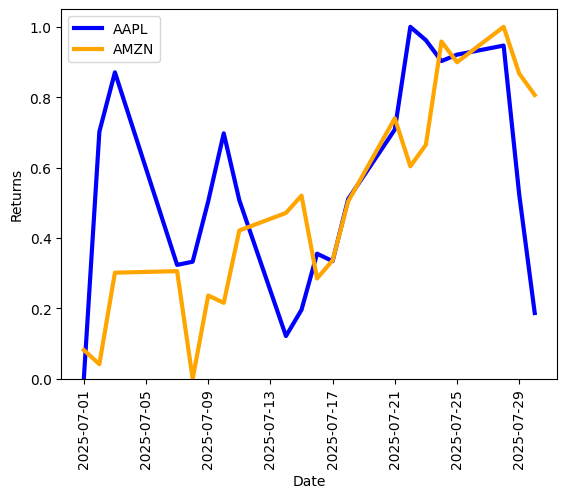

In [38]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

y1=data['AAPL.O'].tolist() #to make a list
y2=data['AMZN.O'].tolist()

plt.figure() #define a new figure
plt.plot(data.index, y1, linewidth=3,label='AAPL',color='blue') #define the line for AAPL
plt.plot(data.index, y2, linewidth=3,label='AMZN',color='orange') #define the line for AMZN
plt.xlabel('Date') #use label for X axis
plt.xticks(rotation=90) #rotate x axis labels for better visibility
plt.ylabel('Returns') #use label for Y axis
plt.ylim(ymin=0) #specify y axis values to start from 0
plt.legend() # Legend will be included using the labels defined in plt.plot()
plt.show() #Show the figure

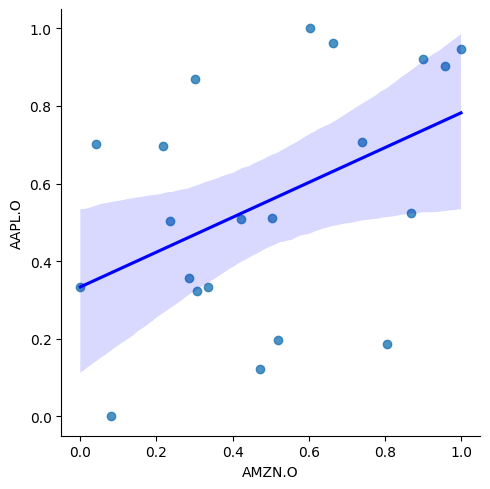

In [39]:
##To fit a regression line between two stock returns
# You can use seaborn's lmplot function to fit a linear regression line between two stock returns.
import seaborn as sns

#Draw a linear regression line between the returns of AMZN and AAPL
sns.lmplot(x="AMZN.O", y="AAPL.O", data=data.astype(float), line_kws={'color':"blue"})

In [40]:
###################################################################
####get the data for the list of stocks
print(ricex)
###################################################################
#Get multiple items (fields) data for a list of instruments
data, err=ek.get_data(ricex,['TR.PriceClose','TR.Volume',
                                'TR.PriceLow','TR.TotalReturnYTD',
                                'TR.TotalReturn52WK',
                                'TR.TotalReturn'])
print(data)
print(err)

['AAPL.O', 'AMZN.O']
  Instrument  Price Close    Volume  Price Low  YTD Total Return  \
0     AAPL.O       238.99  46359288   237.7301         -4.232204   
1     AMZN.O       231.62  42349191     228.71          5.574548   

   52 Week Total Return  Total Return  
0              8.788745      0.352719  
1             24.239661      -1.03824  
None


c:\Users\chlje\VSCodeProjects\KAIST_MFE\.venv\Lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


In [41]:
##find a subset and use Instrument as an index
cols=['YTD Total Return','52 Week Total Return']
# Define a new dataframe with 'Instrument' as the index 
# and only the specified columns
df=data.set_index('Instrument')[cols]
print(df.index)
print(df.iloc[:,0])
print(df)

Index(['AAPL.O', 'AMZN.O'], dtype='string', name='Instrument')
Instrument
AAPL.O   -4.232204
AMZN.O    5.574548
Name: YTD Total Return, dtype: Float64
            YTD Total Return  52 Week Total Return
Instrument                                        
AAPL.O             -4.232204              8.788745
AMZN.O              5.574548             24.239661


In [42]:
print(df.index) # Get the index of the dataframe
print(df.head()) # Get the first 5 rows of the dataframe

Index(['AAPL.O', 'AMZN.O'], dtype='string', name='Instrument')
            YTD Total Return  52 Week Total Return
Instrument                                        
AAPL.O             -4.232204              8.788745
AMZN.O              5.574548             24.239661


Text(0, 0.5, 'Total Returns')

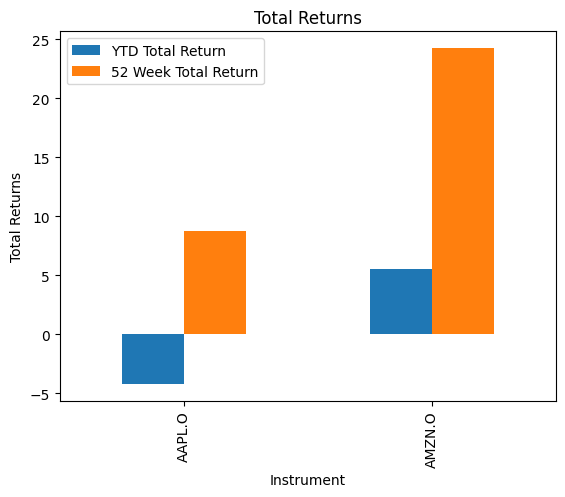

In [43]:
###draw bar graph using the dataframe, df
df.plot(kind="bar")
plt.title("Total Returns")
plt.ylabel("Total Returns")

## Use screen to find a list of securities that satisfy the conditions

Create RHistoryNote3W.xlsx data using API

Using DIB of an equity (e.g., Samsung Electronics), find the data item to be
used as a screening criterion


In [ ]:
#Define screen criteria
exp = "SCREEN(U(IN(Equity(active,public,primary))),\
     IN(TR.ExchangeMarketIdCode,""XKRX""),\
     TR.PE <= 10.0,\
     TR.TtlDebtToTtlEquityPct(Period=FY0) <= 100.0,\
     TR.EBITDAInterestCoverage(Period=FY0) >= 10.00,\
     CURN=KRW)"
#Define the fields to be retrieved
fields = ['TR.COmmonName', 'TR.PE',\
          'TR.TtlDebtToTtlEquityPct(Period=FY0)','TR.EBITDAInterestCoverage(Period=FY0)'] 

# Get the data for the specified screen criteria and fields
# The result will be stored in LowPEHead and any error in err
LowPEHead, err = ek.get_data(exp, fields)

print(LowPEHead.dtypes)
print(LowPEHead.head())

Instrument                             string[python]
Company Common Name                    string[python]
P/E (Daily Time Series Ratio)                 Float64
Total Debt to Total Equity, Percent           Float64
EBITDA Net Interest Coverage Ratio            Float64
dtype: object
  Instrument           Company Common Name  P/E (Daily Time Series Ratio)  \
0  009180.KS       Hansol Logistics Co Ltd                       7.073369   
1  000640.KS  Dong-A Socio Holdings Co Ltd                       1.632972   
2  008260.KS               NI Steel Co Ltd                       6.910582   
3  003300.KS         Hanil Holdings Co Ltd                       9.703174   
4  000240.KS      Hankook & Company Co Ltd                       7.352951   

   Total Debt to Total Equity, Percent  EBITDA Net Interest Coverage Ratio  
0                            38.394767                           15.738507  
1                            70.498986                           23.369201  
2                     

c:\Users\chlje\VSCodeProjects\KAIST_MFE\.venv\Lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


In [45]:
#change the column name from 'Instrument' to 'id'
LowPEHead.rename(columns={'Instrument':'id'},inplace=True)

print(LowPEHead)

LowPEHead.to_feather('LowPEHeadKRX.ft')# save the data

           id                      Company Common Name  \
0   009180.KS                  Hansol Logistics Co Ltd   
1   000640.KS             Dong-A Socio Holdings Co Ltd   
2   008260.KS                          NI Steel Co Ltd   
3   003300.KS                    Hanil Holdings Co Ltd   
4   000240.KS                 Hankook & Company Co Ltd   
5   006390.KS              Hanil Hyundai Cement Co Ltd   
6   000050.KS                            Kyungbang Ltd   
7   000890.KS                     Bohae Brewery Co Ltd   
8   005810.KS                   Poongsan Holdings Corp   
9   000370.KS          Hanwha General Insurance Co Ltd   
10  009160.KS                               SIMPAC Inc   
11  001250.KS                           GS Global Corp   
12  000120.KS                        CJ Logistics Corp   
13  072710.KS                 Nongshim Holdings Co Ltd   
14  002350.KS                          Nexen Tire Corp   
15  004250.KS                  National Plastic Co Ltd   
16  005390.KS 

In [46]:
##store the list of ids in the dataframe, LowPEHead to firms
firms=list(LowPEHead.id)
print(firms)

['009180.KS', '000640.KS', '008260.KS', '003300.KS', '000240.KS', '006390.KS', '000050.KS', '000890.KS', '005810.KS', '000370.KS', '009160.KS', '001250.KS', '000120.KS', '072710.KS', '002350.KS', '004250.KS', '005390.KS', '015890.KS', '020000.KS', '019180.KS', '053690.KS', '100220.KS', '102260.KS', '014830.KS', '089470.KS', '093050.KS', '117580.KS', '058860.KS', '129260.KS', '013870.KS', '264900.KS']


## Retrieve stock returns

There are two ways to get stock returns

One is to use return calculated by LSEG (e.g., TR.TotalReturn1Mo)

The second way is to use return index (which adjusts for stock splits/stock dividends and dividends) to calculate returns.

In [47]:
## Retrieve the data for the list of RICs
## "get_data" is used with options to specify time period and intervals
## TR.PriceClose adjust prices for stock splits: check below

# Define the fields to be retrieved, spcifying the start and end dates, and frequency
# The frequency is set to 'M' for monthly data
# .calcdate and .date are used to get the calculation date and the date of the data
# respectively, for the TotalReturn1Mo field

fd =['TR.PriceClose(SDate=2020-01-31,EDate=2024-12-31,Frq=M)',
     'TR.TotalReturn1Mo(SDate=2020-01-31,EDate=2024-12-31,Frq=M)',
         'TR.TotalReturn1Mo(SDate=2020-01-31,EDate=2024-12-31,Frq=M).calcdate',
         'TR.TotalReturn1Mo(SDate=2020-01-31,EDate=2024-12-31,Frq=M).date']
dataKR, err=ek.get_data(firms,fields=fd)
print(dataKR)
print(dataKR.columns)
print(dataKR.head())

     Instrument  Price Close  1 Month Total Return   Calc Date  \
0     009180.KS       1560.0              1.628664  2020-01-31   
1     009180.KS       1490.0             -11.83432  2020-02-29   
2     009180.KS       1115.0            -25.167785  2020-03-31   
3     009180.KS       1470.0             39.336493  2020-04-30   
4     009180.KS       1465.0             -0.340136  2020-05-31   
...         ...          ...                   ...         ...   
1855  264900.KS       8450.0            -13.599182  2024-08-31   
1856  264900.KS       8740.0              3.431953  2024-09-30   
1857  264900.KS       8530.0             -2.402746  2024-10-31   
1858  264900.KS       8030.0             -5.082742  2024-11-30   
1859  264900.KS       7790.0              0.462687  2024-12-31   

                      Date  
0     2020-01-31T00:00:00Z  
1     2020-02-28T00:00:00Z  
2     2020-03-31T00:00:00Z  
3     2020-04-29T00:00:00Z  
4     2020-05-29T00:00:00Z  
...                    ...  
1855

c:\Users\chlje\VSCodeProjects\KAIST_MFE\.venv\Lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


### Let's sort the data by 'Instrument' and 'Date'

In [48]:
#sort the data and replace the orignal data
dataKR.sort_values(['Instrument','Date'],inplace=True) 
#reset the index and replace the original data
dataKR.reset_index(drop=True,inplace=True)  

# In the above, (drop=True (discard old index) and inplace=True (replace the old data))

print(dataKR.head())
print(dataKR[['Price Close','1 Month Total Return']].head())
print(dataKR.columns)

#save the data
dataKR.to_feather('RHistory.ft')

  Instrument  Price Close  1 Month Total Return   Calc Date  \
0  000050.KS       9120.0             -1.724138  2020-01-31   
1  000050.KS       9140.0                  -0.0  2020-02-29   
2  000050.KS       7780.0             -14.87965  2020-03-31   
3  000050.KS      10000.0             32.275132  2020-04-30   
4  000050.KS      14000.0                  40.0  2020-05-31   

                   Date  
0  2020-01-31T00:00:00Z  
1  2020-02-28T00:00:00Z  
2  2020-03-31T00:00:00Z  
3  2020-04-29T00:00:00Z  
4  2020-05-29T00:00:00Z  
   Price Close  1 Month Total Return
0       9120.0             -1.724138
1       9140.0                  -0.0
2       7780.0             -14.87965
3      10000.0             32.275132
4      14000.0                  40.0
Index(['Instrument', 'Price Close', '1 Month Total Return', 'Calc Date',
       'Date'],
      dtype='object')


In [49]:
# Print out the list of instruments after dropping duplicates    
print(dataKR.Instrument.drop_duplicates())

#print out a certain instrument's information
print(dataKR[dataKR.Instrument=='000240.KS'])

0       000050.KS
60      000120.KS
120     000240.KS
180     000370.KS
240     000640.KS
300     000890.KS
360     001250.KS
420     002350.KS
480     003300.KS
540     004250.KS
600     005390.KS
660     005810.KS
720     006390.KS
780     008260.KS
840     009160.KS
900     009180.KS
960     013870.KS
1020    014830.KS
1080    015890.KS
1140    019180.KS
1200    020000.KS
1260    053690.KS
1320    058860.KS
1380    072710.KS
1440    089470.KS
1500    093050.KS
1560    100220.KS
1620    102260.KS
1680    117580.KS
1740    129260.KS
1800    264900.KS
Name: Instrument, dtype: string
    Instrument  Price Close  1 Month Total Return   Calc Date  \
120  000240.KS      13250.0             -7.986111  2020-01-31   
121  000240.KS      12250.0              -7.54717  2020-02-29   
122  000240.KS       8550.0            -30.204082  2020-03-31   
123  000240.KS      10100.0             20.095125  2020-04-30   
124  000240.KS      10100.0                  -0.0  2020-05-31   
125  000240.KS      

#### Save the data into an excel file

In [50]:
import os
os.getcwd() #find out the current working directory

'c:\\Users\\chlje\\VSCodeProjects\\KAIST_MFE\\BAF507금융DB\\3주차\\Python Related Files-20250916'

In [51]:
#Save the data to an Excel file
# The sheet name is set to "LowPEKRX"
dataKR.to_excel('RHistoryNote3W.xlsx',sheet_name="LowPEKRX")

#### Use adjusted prices to calculated returns

You can get the prices and convert them to returns

Make sure that you get adjusted prices

Here, we are using timeseries

In [52]:
## Get the timeseries data for the specified RICs
# Example: Get the close prices for the specified RICs from January 31, 2021, to December 31, 2024
# The firms variable contains the list of RICs obtained from LowPEHead
pdata=ek.get_timeseries(firms, #the list of RICs
                       fields='CLOSE', #close field
                       start_date='2020-01-31', #start date
                       end_date='2024-12-31',
                       count = None,
                       interval='monthly',
                       calendar = None, corax = 'adjusted',
                       normalize = False, raw_output = False, debug = False)
print(pdata.head())
#Stack the data to convert it into a long format
# This will create a multi-index dataframe with 'Instrument' and 'Date' as indices
df1=pdata.stack().reset_index()

CLOSE       009180.KS   000640.KS  008260.KS   003300.KS  000240.KS  \
Date                                                                  
2020-01-31       1560  91165.0686       2090  7093.45461      13250   
2020-02-29       1490  83106.8144       1750  6299.06246      12250   
2020-03-31       1115  79320.4058       1410  6364.48299       8550   
2020-04-30       1470  84854.3876       1795   7943.9215      10100   
2020-05-31       1465  87281.5726       2125  8775.69681      10100   

CLOSE       006390.KS  000050.KS  000890.KS     005810.KS  000370.KS  ...  \
Date                                                                  ...   
2020-01-31      28400       9120       1030  14222.236444       2340  ...   
2020-02-29      24000       9140        896  13288.902178       2205  ...   
2020-03-31      23000       7780        741  11044.455489       1695  ...   
2020-04-30      31650      10000        880  12777.790556       2190  ...   
2020-05-31      29700      14000        

In [53]:
print(pdata.head())
print(df1.head())

CLOSE       009180.KS   000640.KS  008260.KS   003300.KS  000240.KS  \
Date                                                                  
2020-01-31       1560  91165.0686       2090  7093.45461      13250   
2020-02-29       1490  83106.8144       1750  6299.06246      12250   
2020-03-31       1115  79320.4058       1410  6364.48299       8550   
2020-04-30       1470  84854.3876       1795   7943.9215      10100   
2020-05-31       1465  87281.5726       2125  8775.69681      10100   

CLOSE       006390.KS  000050.KS  000890.KS     005810.KS  000370.KS  ...  \
Date                                                                  ...   
2020-01-31      28400       9120       1030  14222.236444       2340  ...   
2020-02-29      24000       9140        896  13288.902178       2205  ...   
2020-03-31      23000       7780        741  11044.455489       1695  ...   
2020-04-30      31650      10000        880  12777.790556       2190  ...   
2020-05-31      29700      14000        

In [54]:
#Change the column names for better readability
# Rename the columns to 'id' for Instrument and 'adjprc' for adjusted price
df1.rename(columns={'CLOSE':'id',0:'adjprc'},inplace=True)
print(df1)
#Sort the data by 'id' and 'Date' and replace the original data
df1.sort_values(['id','Date'],inplace=True)
df1.reset_index(drop=True, inplace=True)
print(df1.head())
print(df1.columns)

           Date         id      adjprc
0    2020-01-31  009180.KS        1560
1    2020-01-31  000640.KS  91165.0686
2    2020-01-31  008260.KS        2090
3    2020-01-31  003300.KS  7093.45461
4    2020-01-31  000240.KS       13250
...         ...        ...         ...
1855 2024-12-31  117580.KS        8490
1856 2024-12-31  058860.KS        2610
1857 2024-12-31  129260.KS        2415
1858 2024-12-31  013870.KS        3670
1859 2024-12-31  264900.KS        7790

[1860 rows x 3 columns]
        Date         id adjprc
0 2020-01-31  000050.KS   9120
1 2020-02-29  000050.KS   9140
2 2020-03-31  000050.KS   7780
3 2020-04-30  000050.KS  10000
4 2020-05-31  000050.KS  14000
Index(['Date', 'id', 'adjprc'], dtype='object')


#### Let's check whether the returns using adjusted prices are same as returns calculated by EIKON

In [55]:
print(dataKR.columns)
print(df1.columns)
print(dataKR.dtypes)
print(df1.dtypes)

Index(['Instrument', 'Price Close', '1 Month Total Return', 'Calc Date',
       'Date'],
      dtype='object')
Index(['Date', 'id', 'adjprc'], dtype='object')
Instrument              string[python]
Price Close                    Float64
1 Month Total Return           Float64
Calc Date               string[python]
Date                    string[python]
dtype: object
Date      datetime64[s]
id               object
adjprc           object
dtype: object


In [56]:
#change the format of Calc Date column to datetime format so that
#the merge operation can be performed correctly using the same data format
#of the columns used in the merge operation

dataKR['Calc Date']=pd.to_datetime(dataKR['Calc Date']) 
test=pd.merge(dataKR.drop(columns=['Date']),df1,how='left',left_on=['Instrument','Calc Date'],\
              right_on=['id','Date'])
#In the above, drop(columns=['Date']), drop the specified columns
print(test)

     Instrument  Price Close  1 Month Total Return  Calc Date       Date  \
0     000050.KS       9120.0             -1.724138 2020-01-31 2020-01-31   
1     000050.KS       9140.0                  -0.0 2020-02-29 2020-02-29   
2     000050.KS       7780.0             -14.87965 2020-03-31 2020-03-31   
3     000050.KS      10000.0             32.275132 2020-04-30 2020-04-30   
4     000050.KS      14000.0                  40.0 2020-05-31 2020-05-31   
...         ...          ...                   ...        ...        ...   
1855  264900.KS       8450.0            -13.599182 2024-08-31 2024-08-31   
1856  264900.KS       8740.0              3.431953 2024-09-30 2024-09-30   
1857  264900.KS       8530.0             -2.402746 2024-10-31 2024-10-31   
1858  264900.KS       8030.0             -5.082742 2024-11-30 2024-11-30   
1859  264900.KS       7790.0              0.462687 2024-12-31 2024-12-31   

             id adjprc  
0     000050.KS   9120  
1     000050.KS   9140  
2     000050

In [57]:
#Store only those rows that satisfy the conditions
test1=test.loc[test['Price Close'].notnull() & test.adjprc.astype('float').notnull(),:].copy()
#In the above, rows that satisfy the conditions are stored in test1

print((test1['Price Close']-test1.adjprc.astype('float')).describe())

count    1860.0
mean       -0.0
std         0.0
min        -0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
dtype: Float64


### Check adjusted vs. unadjusted prices

Check a case which experienced stock splits

Samsung electronics which splitted stocks on May 11, 2018


In [58]:
# Get the adjusted and unadjusted close prices for Samsung Electronics
# and store them in adp and unadp respectively
# The adjusted prices are adjusted for stock splits and dividends
adp=ek.get_timeseries('081660.KS', #the list of RICs
                       fields='CLOSE', #close field
                       start_date='2018-01-31', #start date
                       end_date='2018-12-31',
                       count = None,
                       interval='monthly',
                       calendar = None, corax = 'adjusted',
                       normalize = False, raw_output = False, debug = False)
unadp=ek.get_timeseries('081660.KS', #the list of RICs
                       fields='CLOSE', #close field
                       start_date='2018-01-31', #start date
                       end_date='2018-12-31',
                       count = None,
                       interval='monthly',
                       calendar = None, corax = 'unadjusted',
                       normalize = False, raw_output = False, debug = False)
# The fields to be retrieved, specifying the start and end dates, and frequency
# The frequency is set to 'M' for monthly data
fd =['TR.PriceClose(SDate=2018-01-31,EDate=2018-12-31,Frq=M)',
         'TR.PriceClose(SDate=2018-01-31,EDate=2018-12-31,Frq=M).date']
closep, err=ek.get_data('081660.KS',fields=fd)

##compare to check whether TR.PriceClose is adjusted price or unadjusted price
print(closep)
print(adp)
print(unadp)

   Instrument  Price Close                  Date
0   081660.KS        17280  2018-01-31T00:00:00Z
1   081660.KS        19940  2018-02-28T00:00:00Z
2   081660.KS        21700  2018-03-30T00:00:00Z
3   081660.KS        26100  2018-04-30T00:00:00Z
4   081660.KS        29150  2018-05-31T00:00:00Z
5   081660.KS        33650  2018-06-29T00:00:00Z
6   081660.KS        31700  2018-07-31T00:00:00Z
7   081660.KS        41750  2018-08-31T00:00:00Z
8   081660.KS        44900  2018-09-28T00:00:00Z
9   081660.KS        42050  2018-10-31T00:00:00Z
10  081660.KS        50800  2018-11-30T00:00:00Z
11  081660.KS        53500  2018-12-28T00:00:00Z
081660.KS   CLOSE
Date             
2018-01-31  17280
2018-02-28  19940
2018-03-31  21700
2018-04-30  26100
2018-05-31  29150
2018-06-30  33650
2018-07-31  31700
2018-08-31  41750
2018-09-30  44900
2018-10-31  42050
2018-11-30  50800
2018-12-31  53500
081660.KS    CLOSE
Date              
2018-01-31   86400
2018-02-28   99700
2018-03-31  108500
2018-04-30  1305

c:\Users\chlje\VSCodeProjects\KAIST_MFE\.venv\Lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


### Let's get the US data

In [59]:
#Specify the screening criteria for US stocks
exp = "SCREEN(U(IN(Equity(active,public,primary))),\
     IN(TR.ExchangeCountryCode,""US""),\
     IN(TR.ExchangeMarketIdCode,""XNYS""),\
     TR.PE <= 10.0,\
     TR.TotalDebtToEV <= 50.0,\
     CURN=USD)"
#Specify the fields to be retrieved
fields = ['TR.COmmonName', 'TR.PE',\
          'TR.TotalDebtToEV'] 
# Get the data for the specified screen criteria and fields
# The result will be stored in LowPEHeadUS and any error in err
LowPEHeadUS, err = ek.get_data(exp, fields)

print(LowPEHeadUS.columns)
LowPEHeadUS.rename(columns={'Instrument':'id'},inplace=True)
print(LowPEHeadUS)
#save the data
LowPEHeadUS.to_feather('LowPEHeadUS.ft')

Index(['Instrument', 'Company Common Name', 'P/E (Daily Time Series Ratio)',
       'Total Debt To Enterprise Value (Daily Time Series Ratio)'],
      dtype='object')
         id             Company Common Name  P/E (Daily Time Series Ratio)  \
0     PRG.N               PROG Holdings Inc                       7.071265   
1    MATX.N                      Matson Inc                        7.12336   
2     CAG.N              Conagra Brands Inc                       7.885555   
3     TAP.N        Molson Coors Beverage Co                       9.341266   
4     DAL.N             Delta Air Lines Inc                       8.390493   
..      ...                             ...                            ...   
157  NMAI.N  Nuveen Multi-Asset Income Fund                       7.827907   
158  FSCO.N    FS Credit Opportunities Corp                       8.271271   
159   MNR.N       Mach Natural Resources LP                       6.975729   
160    HG.N    Hamilton Insurance Group Ltd          

c:\Users\chlje\VSCodeProjects\KAIST_MFE\.venv\Lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


### Get the list of the stocks and retreive stock returns

In [60]:
#Get the list of ids from LowPEHeadUS
# This will be used to retrieve the timeseries data for these firms
firms=list(LowPEHeadUS.id)
print(firms)

#Specify the fields to be retrieved

fd =['TR.PriceClose(SDate=2020-01-31,EDate=2024-12-31,Frq=M)',
     'TR.TotalReturn1Mo(SDate=2020-01-31,EDate=2024-12-31,Frq=M)',
         'TR.TotalReturn1Mo(SDate=2020-01-31,EDate=2024-12-31,Frq=M).calcdate',
         'TR.TotalReturn1Mo(SDate=2020-01-31,EDate=2024-12-31,Frq=M).date']
dataUS, err=ek.get_data(firms,fields=fd)

print(dataUS.columns)
#Sort the data by 'Instrument' and 'Date' and replace the original data
dataUS.sort_values(['Instrument','Date'],inplace=True)
#Reset the index and replace the original data
dataUS.reset_index(drop=True,inplace=True)
print(dataUS.head())
print(dataUS.describe())

['PRG.N', 'MATX.N', 'CAG.N', 'TAP.N', 'DAL.N', 'DNP.N', 'GAP.N', 'MTH.N', 'KBH.N', 'BBWI.N', 'MSB.N', 'NL.N', 'NC.N', 'NRT.N', 'PVH.N', 'SNV.N', 'EMF.N', 'SABA.N', 'TTI.N', 'KMPR.N', 'UHS.N', 'GHC.N', 'CRT.N', 'M.N', 'ADX.N', 'MTG.N', 'RDN.N', 'SM.N', 'SITC.N', 'ALL.N', 'MHO.N', 'EMN.N', 'TK.N', 'SGU.N', 'RNR.N', 'NUS.N', 'ANF.N', 'INVX.N', 'ASA.N', 'TY.N', 'SOR.N', 'BTO.N', 'UNM.N', 'TEI.N', 'ASG.N', 'USA.N', 'FLR.N', 'DVN.N', 'PCN.N', 'ABG.N', 'RQI.N', 'NRP.N', 'CRI.N', 'NCV.N', 'AXS.N', 'RNP.N', 'NCZ.N', 'GDV.N', 'TYG.N', 'AGO.N', 'UTF.N', 'FFA.N', 'KYN.N', 'TDF.N', 'EOS.N', 'PFN.N', 'CPA.N', 'SD.N', 'IGD.N', 'IFN.N', 'CAF.N', 'CII.N', 'CEE.N', 'PGP.N', 'BDJ.N', 'EEA.N', 'GF.N', 'BOE.N', 'ZTR.N', 'ETV.N', 'ETW.N', 'FT.N', 'PMM.N', 'GAM.N', 'EMD.N', 'CHN.N', 'IGA.N', 'DAC.N', 'FOF.N', 'SBH.N', 'GRBK.N', 'NIE.N', 'EOD.N', 'MVO.N', 'EDD.N', 'AWP.N', 'JCE.N', 'ETJ.N', 'TNK.N', 'FOR.N', 'NOG.N', 'NTB.N', 'STNG.N', 'EDF.N', 'VOC.N', 'DPG.N', 'SQNS.N', 'SXC.N', 'ALSN.N', 'VTOL.N', 'MTDR.N'

c:\Users\chlje\VSCodeProjects\KAIST_MFE\.venv\Lib\site-packages\eikon\data_grid.py:255: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


#### You can convert a string columns to a numeric column

In [61]:
print(dataUS.dtypes)

Instrument              string[python]
Price Close                    Float64
1 Month Total Return    string[python]
Calc Date               string[python]
Date                    string[python]
dtype: object


In [62]:
# Convert the '1 Month Total Return' column to numeric type and call the column 'ret'
# This will handle any non-numeric values by converting them to NaN
dataUS['ret']=pd.to_numeric(dataUS['1 Month Total Return'], errors='coerce')
dataUS.ret.describe()

count         9140.0
mean        1.636199
std        28.145381
min       -81.430746
25%         -4.75024
50%         1.092788
75%         6.378273
max      2369.154843
Name: ret, dtype: Float64

In [63]:
#Drop the '1 Month Total Return' column as it is no longer needed
# This column has been converted to 'ret' and is no longer needed
dataUS.drop(columns=['1 Month Total Return'],inplace=True)
print(dataUS.dtypes)
print(dataUS[['Price Close','ret']].head(50))

#Save
dataUS.to_feather('RHistoryESE.ft')
print(dataUS.columns)

#Save
dataUS.to_feather('RHistory.ft')

Instrument     string[python]
Price Close           Float64
Calc Date      string[python]
Date           string[python]
ret                   Float64
dtype: object
    Price Close        ret
0         13.95 -35.146444
1         13.87  -4.344828
2          6.16 -55.587599
3          8.15  34.266886
4          9.21  13.006135
5         11.24   22.04126
6          13.0  15.658363
7         14.62  12.461538
8         11.63 -23.082011
9         12.92  11.092003
10         19.9  54.024768
11        23.05  15.829146
12         18.0 -21.908894
13        24.55  32.702703
14        32.49  32.342159
15        36.64  11.131332
16        39.67   8.269651
17        36.84  -7.133854
18        40.15   8.984799
19        44.37  10.510585
20        48.94  11.101022
21        45.95   -5.90739
22        46.53   1.262242
23        59.58  28.046422
24        56.71  -4.817053
25        75.34  31.254355
26        90.03  19.638202
27         67.8 -26.456232
28        61.72  -8.816536
29        45.58 -29.333333

In [64]:
#List the unique instruments in the dataUS dataframe
dataUS.Instrument.drop_duplicates().tolist()

['AA.N',
 'ABG.N',
 'ACV.N',
 'ADX.N',
 'AGO.N',
 'AIO.N',
 'ALL.N',
 'ALSN.N',
 'ANF.N',
 'ARDT.N',
 'ASA.N',
 'ASG.N',
 'ASIX.N',
 'AWP.N',
 'AXS.N',
 'BBWI.N',
 'BCAT.N',
 'BDJ.N',
 'BIT.N',
 'BOE.N',
 'BST.N',
 'BTO.N',
 'CAF.N',
 'CAG.N',
 'CBNA.N',
 'CCS.N',
 'CEE.N',
 'CHN.N',
 'CII.N',
 'CPA.N',
 'CRC.N',
 'CRI.N',
 'CRT.N',
 'DAC.N',
 'DAL.N',
 'DFH.N',
 'DNP.N',
 'DPG.N',
 'DVN.N',
 'EDD.N',
 'EDF.N',
 'EEA.N',
 'EMD.N',
 'EMF.N',
 'EMN.N',
 'EOD.N',
 'EOS.N',
 'ESNT.N',
 'ETJ.N',
 'ETV.N',
 'ETW.N',
 'FFA.N',
 'FINV.N',
 'FLR.N',
 'FOF.N',
 'FOR.N',
 'FSCO.N',
 'FT.N',
 'GAM.N',
 'GAP.N',
 'GDV.N',
 'GF.N',
 'GGZ.N',
 'GHC.N',
 'GHY.N',
 'GRBK.N',
 'HBB.N',
 'HG.N',
 'HKD.N',
 'HRTG.N',
 'IFN.N',
 'IGA.N',
 'IGD.N',
 'INVX.N',
 'JCE.N',
 'JGH.N',
 'JILL.N',
 'JPI.N',
 'KBH.N',
 'KMPR.N',
 'KYN.N',
 'LBRT.N',
 'LDP.N',
 'M.N',
 'MATX.N',
 'MEGI.N',
 'MHO.N',
 'MNR.N',
 'MSB.N',
 'MSIF.N',
 'MTDR.N',
 'MTG.N',
 'MTH.N',
 'MVO.N',
 'NBXG.N',
 'NC.N',
 'NCV.N',
 'NCZ.N',
 'NIE.N

In [65]:
#Check an example
print(dataUS.loc[dataUS.Instrument=='BDJ.N',['Date','Price Close']]) 

                      Date  Price Close
1020  2020-01-31T00:00:00Z          9.4
1021  2020-02-28T00:00:00Z         8.25
1022  2020-03-31T00:00:00Z         6.53
1023  2020-04-30T00:00:00Z         7.23
1024  2020-05-29T00:00:00Z         7.33
1025  2020-06-30T00:00:00Z         7.34
1026  2020-07-31T00:00:00Z         7.42
1027  2020-08-31T00:00:00Z          7.6
1028  2020-09-30T00:00:00Z         7.31
1029  2020-10-30T00:00:00Z         7.01
1030  2020-11-30T00:00:00Z          8.2
1031  2020-12-31T00:00:00Z         8.47
1032  2021-01-29T00:00:00Z         8.29
1033  2021-02-26T00:00:00Z         8.73
1034  2021-03-31T00:00:00Z         9.46
1035  2021-04-30T00:00:00Z         9.93
1036  2021-05-28T00:00:00Z        10.34
1037  2021-06-30T00:00:00Z        10.13
1038  2021-07-30T00:00:00Z        10.22
1039  2021-08-31T00:00:00Z        10.19
1040  2021-09-30T00:00:00Z          9.8
1041  2021-10-29T00:00:00Z        10.32
1042  2021-11-30T00:00:00Z         9.73
1043  2021-12-31T00:00:00Z        10.08


### Save the data in to the excel file used above (different worksheet)

In [66]:
#To add a worksheet to an existing excel file, use the following method

#!pip install openpyxl
import openpyxl
#Check the version of openpyxl
print(openpyxl.__version__)

3.1.5


In [ ]:
#To install or upgrade openpyxl, use the following command
# !pip install --upgrade openpyxl

In [67]:
with pd.ExcelWriter('RHistoryNote3W.xlsx',engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:  
    dataUS.to_excel(writer, sheet_name='LowPEUS')